In [14]:
# ML Models: Niave Bayes and SVM Classifiers
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import numpy as np 
from numpy import loadtxt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [7]:
# Set up labels
labels = LabelEncoder().fit(['negative', 'positive'])

# Import Naive-Bayes and SVM learning model predictions
y_pred_nb = np.load('y_predsNB.npy')
y_pred_svm = np.load('y_predsSVM.npy')

# Import ML test data
y_test = np.load('y_test.npy')

In [9]:
# Confusion Matrix helper function
plt.style.use(style='ggplot')
plt.rcParams.update({'font.size': 12})

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

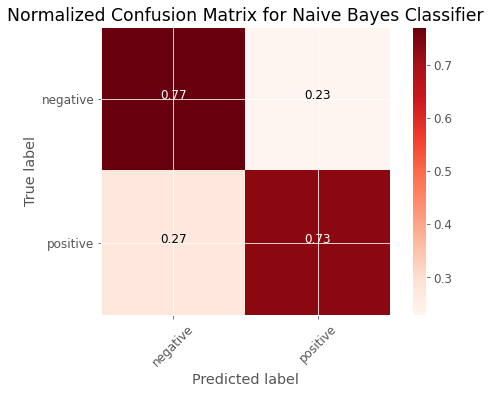

In [10]:
# Naive Bayes Classifier

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_nb)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
fig = plt.figure(figsize=(20,15))
fig.add_subplot(3,3,1)
plot_confusion_matrix(cnf_matrix, classes=['negative', 'positive'], normalize=True,
                      title='Normalized Confusion Matrix for Naive Bayes Classifier')

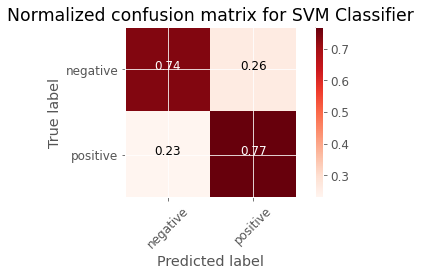

In [11]:
# Support Vector Machine Classifier

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svm)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
fig.add_subplot(3,3,2)
plot_confusion_matrix(cnf_matrix, classes=['negative', 'positive'], normalize=True,
                      title='Normalized confusion matrix for SVM Classifier')

In [12]:
# Helper function for Classification Report 

def classification_report_asdf(test, pred, output_dict=True):
  ''' ------------------------------
  Function to return a classification report 
  as dataframe, with rounded scores. 
  --- Parameters:----
  test = test data as array
  pred = prediction data array
  output_dic = set to True
  ------------------------
  '''
  # extract scores as dictionary
  report = classification_report(test,pred, output_dict=output_dict)
  df_report = pd.DataFrame(report).transpose()
  #round
  df_report[["precision","recall","f1-score"]]= df_report[["precision","recall","f1-score"]].apply(lambda x: round(x,2))
  df_report[["support"]]= df_report[["support"]].apply(lambda x: x.astype(np.int))
  # Add suport to avg
  df_report.loc['accuracy', 'support'] = df_report.loc['weighted avg', 'support']

  return df_report

In [15]:
# Classification reports for ML models

# Naive Bayes Classifier
report_nb = classification_report_asdf(y_test, y_pred_nb)

# SVM Classifier
report_svm = classification_report_asdf(y_test, y_pred_svm)

#Add reports together 
SML_dfs = [report_nb, report_svm]

SML_dfs_combined = pd.concat(
    [df.rename(columns=lambda x: x.zfill(4)) for df in SML_dfs],
    keys=['Naive Bayes Classifier', 'SVM Classifier'],
    axis=1
)

# Show reports
SML_dfs_combined

Naive Bayes Classifier                         SVM Classifier  \
                          precision recall f1-score support      precision   
0                              0.74   0.77     0.76    6948           0.76   
1                              0.76   0.73     0.75    6968           0.75   
accuracy                       0.75   0.75     0.75   13916           0.75   
macro avg                      0.75   0.75     0.75   13916           0.75   
weighted avg                   0.75   0.75     0.75   13916           0.75   

                                      
             recall f1-score support  
0              0.74     0.75    6948  
1              0.77     0.76    6968  
accuracy       0.75     0.75   13916  
macro avg      0.75     0.75   13916  
weighted avg   0.75     0.75   13916